In [ ]:
#Run only 1x

import os
os.environ["PATH"]=os.environ["PATH"]+";C:\\Program Files (x86)\\Graphviz2.38\\bin"
print(os.environ["PATH"])

In [467]:
print(os.environ["PATH"])

/usr/local/bin/python3:/Users/merilin/anaconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/Frameworks/Mono.framework/Versions/Current/Commands;C:\Program Files (x86)\Graphviz2.38\bin;C:\Program Files (x86)\Graphviz2.38\bin


In [338]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [339]:
pd.set_option('max_columns',200)
pd.set_option('max_rows',300)

In [609]:
#Get data from an excel file
data_location = "/Users/merilin/thesis_data_alt.xlsx"
df = pd.read_excel(data_location)
df.head()

rn    country  cluster  date_year  err_broad  err_broad_imf  err_categor  \
0   1  Argentina        1       1980          2              0            3   
1   2  Argentina        1       1981          5              0            0   
2   3  Argentina        1       1982          5              0            0   
3   4  Argentina        1       1983          5              0            0   
4   5  Argentina        1       1984          5              0            0   

   err_categor_no_inf  is_fixed  err_broad_prev  err_categor_prev  imf_coarse  \
0                   2         1               2                 3         3.0   
1                   0         0               2                 3         3.0   
2                   0         0               5                 0         3.0   
3                   0         0               5                 0         3.0   
4                   0         0               5                 0         3.0   

   annual_coarse   dj  djbinary  dflys  dflysbinary  dfrrbinary  \
0            2.0  2.0       0.0    1.0          0.0         1.0   
1            5.0  2.0       0.0    2.0          0.0         0.0   
2            5.0  2.0       0.0    2.0          0.0         0.0   
3            5.0  2.0       0.0    2.0          0.0         0.0   
4            5.0  2.0       0.0    2.0          0.0         0.0   

   population_rel  domesticcredittops_gdp  domesticbankcredit_gdp    kaopen  \
0        1.793044                0.253958                0.329601 -0.086388   
1        1.779836                0.335523                0.484499 -0.086388   
2        1.767858                0.339064                0.459988 -1.135522   
3        1.756719                0.281183                0.462097 -1.135522   
4        1.746239                0.250010                0.417489 -1.135522   

   externaldebtgdpinpercent   loginfl  high  hyper   ag_empl  agri_pc_gdp  \
0                  0.352863  0.696962   1.0    0.0       NaN     0.063535   
1                  0.452961  0.715281   1.0    0.0       NaN     0.064755   
2                  0.517323  0.973717   1.0    0.0  0.001220     0.095962   
3                  0.441624  1.490228   1.0    1.0  0.002656     0.086583   
4                  0.617721  1.983369   1.0    1.0  0.002614     0.083460   

   manuf_empl  manuf_pc_gdp  ind_empl  polariz      frac  yrsoffc  yrcurnt  \
0         NaN      0.294761       NaN      0.0       NaN        4      4.0   
1         NaN      0.287652       NaN      0.0       NaN        5      3.0   
2    0.226243      0.313603     0.293      0.0       NaN        1      2.0   
3    0.228680      0.306695     0.292      0.0       NaN        1      0.0   
4    0.246895      0.297084     0.309      0.0  0.549495        1      5.0   

   externalbalance_gdp   sw  finopen  sdtot  fdinetinflow  portasset  \
0            -0.014217  0.0    -0.05  35.75          0.88       0.06   
1            -0.004509  0.0    -0.05  35.75          1.06       0.07   
2             0.025695  0.0    -1.09  35.75          0.27       0.07   
3             0.033154  0.0    -1.09  35.75          0.18       0.07   
4             0.028334  0.0    -1.09  35.75          0.34       0.10   

   portliab  fdiasset   fdiliab  debtasset  debtliab  fdasset  fdliab  \
0      0.54  0.000000  0.106492   0.471264  0.880114      0.0     0.0   
1      0.24  0.000000  0.103110   0.632285  0.892176      0.0     0.0   
2      0.09  0.000000  0.091271   0.673438  0.907224      0.0     0.0   
3      0.10  0.000000  0.091201   0.876666  0.906569      0.0     0.0   
4      0.12  0.004072  0.093266   0.859991  0.904850      0.0     0.0   

   netexpos  govstrength  govfrac  leftexec  rightexec  cbi  system  checks  \
0 -0.234610     0.000000      NaN       0.0        0.0  1.0     0.0     1.0   
1 -0.393532     0.000000      NaN       0.0        0.0  1.0     0.0     1.0   
2 -0.472247     0.000000      NaN       0.0        0.0  1.0     0.0     1.0   
3 -0.380880     0.000000      NaN       0.0

In [539]:
#Drop redundant columns
drop_cols = df[['rn','country','loginfl:1','resm2_inv','gdpcurrentusd_mil','tot_index.1']]
data = df.drop(drop_cols,axis=1,inplace=True)

cols_to_keep = df.columns.where(df.isnull().sum()<270).dropna()

# Add the variable mean for missing values
for col in cols_to_keep:
    df[col].fillna(df[col].mean(),inplace=True)

In [540]:
# Create a new df excluding columns with many missing values
df2 = pd.DataFrame(df[df.columns[df.columns.isin(cols_to_keep)]])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 94 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cluster                   682 non-null    int64  
 1   date_year                 682 non-null    int64  
 2   err_broad                 682 non-null    int64  
 3   err_broad_imf             682 non-null    int64  
 4   err_categor               682 non-null    int64  
 5   err_categor_no_inf        682 non-null    int64  
 6   is_fixed                  682 non-null    int64  
 7   err_broad_prev            682 non-null    int64  
 8   err_categor_prev          682 non-null    int64  
 9   imf_coarse                682 non-null    float64
 10  annual_coarse             682 non-null    float64
 11  dj                        682 non-null    float64
 12  djbinary                  682 non-null    float64
 13  dflys                     682 non-null    float64
 14  dflysbinar

In [615]:
# Create lists of columns for dependent and explanatory variables
dep_candidates = ['err_broad','err_broad_imf','err_categor','err_categor_no_inf','is_fixed'
                      ,'imf_coarse','annual_coarse','dj','djbinary','dflys','dflysbinary','dfrrbinary']

exp_candidates = df2.columns[~df2.columns.isin(dep_candidates)]

In [616]:
# New variables for dropping some columns
dependent = pd.DataFrame(df2[dep_candidates])
explanatory = pd.DataFrame(df2[exp_candidates])

#'err_broad_prev','err_categor_prev',
explanatory.drop(explanatory[['loginfl','inflation_annual','log_inf_prev_level','Independence','err_broad_prev']],axis=1,inplace=True)

In [617]:
explanatory.columns

Index(['cluster', 'date_year', 'err_categor_prev', 'population_rel',
       'domesticcredittops_gdp', 'domesticbankcredit_gdp', 'kaopen',
       'externaldebtgdpinpercent', 'high', 'hyper', 'agri_pc_gdp',
       'manuf_pc_gdp', 'ind_empl', 'polariz', 'frac', 'yrsoffc', 'yrcurnt',
       'externalbalance_gdp', 'finopen', 'sdtot', 'fdinetinflow', 'portasset',
       'portliab', 'fdiasset', 'fdiliab', 'debtasset', 'debtliab', 'fdasset',
       'fdliab', 'netexpos', 'govstrength', 'govfrac', 'leftexec', 'rightexec',
       'system', 'checks', 'legelec', 'exelec', 'election', 'viewdj',
       'viewlys', 'viewrr', 'gdp_pc_rel', 'fdi_liab_gdp', 'debt_in_usd',
       'oppvote', 'oppfrac', 'fdiliabilities_pc_gdp',
       'importsplusexportsofgdp', 'cabalance_gdp', 'tradebalance_gdp',
       'tot_index', 'sdtot:1', 'gdp_prev_level', 'gdp_growth', 'gdp_pc_ppp',
       'gdp_ppp_prev_level', 'gdp_ppp_growth', 'res_turnover',
       'resm2_inv_prev_level', 'increase_reserves', 'exports_gdp',
       

In [618]:
#Get continuous columns and remove the ones that do not need transforming
cont_vars = df2.loc[:,df2.dtypes=='float64'].columns.tolist()
cont_vars

['imf_coarse',
 'annual_coarse',
 'dj',
 'djbinary',
 'dflys',
 'dflysbinary',
 'dfrrbinary',
 'population_rel',
 'domesticcredittops_gdp',
 'domesticbankcredit_gdp',
 'kaopen',
 'externaldebtgdpinpercent',
 'loginfl',
 'high',
 'hyper',
 'agri_pc_gdp',
 'manuf_pc_gdp',
 'ind_empl',
 'polariz',
 'frac',
 'yrcurnt',
 'externalbalance_gdp',
 'finopen',
 'sdtot',
 'fdinetinflow',
 'portasset',
 'portliab',
 'fdiasset',
 'fdiliab',
 'debtasset',
 'debtliab',
 'fdasset',
 'fdliab',
 'netexpos',
 'govstrength',
 'govfrac',
 'leftexec',
 'rightexec',
 'system',
 'checks',
 'legelec',
 'exelec',
 'election',
 'viewdj',
 'viewlys',
 'viewrr',
 'gdp_pc_rel',
 'fdi_liab_gdp',
 'debt_in_usd',
 'oppvote',
 'oppfrac',
 'fdiliabilities_pc_gdp',
 'importsplusexportsofgdp',
 'cabalance_gdp',
 'tradebalance_gdp',
 'tot_index',
 'sdtot:1',
 'log_inf_prev_level',
 'gdp_prev_level',
 'gdp_growth',
 'gdp_pc_ppp',
 'gdp_ppp_prev_level',
 'gdp_ppp_growth',
 'res_turnover',
 'resm2_inv_prev_level',
 'exports_g

In [619]:
#rems = ['imf_coarse', 'annual_coarse', 'dj', 'djbinary', 'dflys', 'dflysbinary','dfrrbinary', 'loginfl','inflation_annual','Independence', 'currency_crises', 'inflation_crises','inflation_categor','high','hyper','polariz','banking_crisis', 'systemic_crisis', 'domestic_debt_default', 'debt_default1', 'debt_default2']

In [620]:
rems = ['loginfl','inflation_annual','Independence', 'currency_crises', 
        'inflation_crises','inflation_categor','high','hyper','polariz',
        'banking_crisis', 'systemic_crisis', 'domestic_debt_default', 'debt_default1', 'debt_default2']

In [621]:
for rem in rems:
    print(rem)
    try:
        cont_vars.remove(rem)
    except:
        continue
print(cont_vars)

loginfl
inflation_annual
Independence
currency_crises
inflation_crises
inflation_categor
high
hyper
polariz
banking_crisis
systemic_crisis
domestic_debt_default
debt_default1
debt_default2
['imf_coarse', 'annual_coarse', 'dj', 'djbinary', 'dflys', 'dflysbinary', 'dfrrbinary', 'population_rel', 'domesticcredittops_gdp', 'domesticbankcredit_gdp', 'kaopen', 'externaldebtgdpinpercent', 'agri_pc_gdp', 'manuf_pc_gdp', 'ind_empl', 'frac', 'yrcurnt', 'externalbalance_gdp', 'finopen', 'sdtot', 'fdinetinflow', 'portasset', 'portliab', 'fdiasset', 'fdiliab', 'debtasset', 'debtliab', 'fdasset', 'fdliab', 'netexpos', 'govstrength', 'govfrac', 'leftexec', 'rightexec', 'system', 'checks', 'legelec', 'exelec', 'election', 'viewdj', 'viewlys', 'viewrr', 'gdp_pc_rel', 'fdi_liab_gdp', 'debt_in_usd', 'oppvote', 'oppfrac', 'fdiliabilities_pc_gdp', 'importsplusexportsofgdp', 'cabalance_gdp', 'tradebalance_gdp', 'tot_index', 'sdtot:1', 'log_inf_prev_level', 'gdp_prev_level', 'gdp_growth', 'gdp_pc_ppp', 'gdp_

In [622]:
transform_df = df2[cont_vars]

In [623]:
for col in transform_df.columns:
    print(col)
    try:
        transform_df[col] = pd.qcut(transform_df[col],q=[0,0.25,0.5,0.75,1],labels=[1,2,3,4],duplicates='drop')
    except:
        try:
            transform_df[col] = pd.qcut(transform_df[col],q=[0,0.25,0.5,0.75,1],labels=[1,2,3],duplicates='drop')
        except:
            try:
                transform_df[col] = pd.qcut(transform_df[col],q=[0,0.25,0.5,0.75,1],labels=[1,2],duplicates='drop')
            except:
                transform_df[col] = pd.qcut(transform_df[col],q=[0,0.25,0.5,0.75,1],labels=[1],duplicates='drop')

imf_coarse
annual_coarse
dj
djbinary
dflys
dflysbinary
dfrrbinary
population_rel
domesticcredittops_gdp
domesticbankcredit_gdp
kaopen
externaldebtgdpinpercent
agri_pc_gdp
manuf_pc_gdp
ind_empl
frac
yrcurnt
externalbalance_gdp
finopen
sdtot
fdinetinflow
portasset
portliab
fdiasset
fdiliab
debtasset
debtliab
fdasset
fdliab
netexpos
govstrength
govfrac
leftexec
rightexec
system
checks
legelec
exelec
election
viewdj
viewlys
viewrr
gdp_pc_rel
fdi_liab_gdp
debt_in_usd
oppvote
oppfrac
fdiliabilities_pc_gdp
importsplusexportsofgdp
cabalance_gdp
tradebalance_gdp
tot_index
sdtot:1
log_inf_prev_level
gdp_prev_level
gdp_growth
gdp_pc_ppp
gdp_ppp_prev_level
gdp_ppp_growth
res_turnover
resm2_inv_prev_level
exports_gdp
imports_gdp
avg_tariff
avg_rating
GDP_Weighted_default
tot_volatility


/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [624]:
#Drop pre-transformed columns and add new categorical ones
cols = transform_df.columns

for col in cols:
    try:
        print(col)
       # explanatory.drop(transform_df[col].columns, axis = 1, inplace=True)
        explanatory[col] = transform_df[col]
        explanatory = explanatory[explanatory.columns[~explanatory.columns.isin(dep_candidates)]]
    except:
        continue
    
explanatory.columns

imf_coarse
annual_coarse
dj
djbinary
dflys
dflysbinary
dfrrbinary
population_rel
domesticcredittops_gdp
domesticbankcredit_gdp
kaopen
externaldebtgdpinpercent
agri_pc_gdp
manuf_pc_gdp
ind_empl
frac
yrcurnt
externalbalance_gdp
finopen
sdtot
fdinetinflow
portasset
portliab
fdiasset
fdiliab
debtasset
debtliab
fdasset
fdliab
netexpos
govstrength
govfrac
leftexec
rightexec
system
checks
legelec
exelec
election
viewdj
viewlys
viewrr
gdp_pc_rel
fdi_liab_gdp
debt_in_usd
oppvote
oppfrac
fdiliabilities_pc_gdp
importsplusexportsofgdp
cabalance_gdp
tradebalance_gdp
tot_index
sdtot:1
log_inf_prev_level
gdp_prev_level
gdp_growth
gdp_pc_ppp
gdp_ppp_prev_level
gdp_ppp_growth
res_turnover
resm2_inv_prev_level
exports_gdp
imports_gdp
avg_tariff
avg_rating
GDP_Weighted_default
tot_volatility


Index(['cluster', 'date_year', 'err_categor_prev', 'population_rel',
       'domesticcredittops_gdp', 'domesticbankcredit_gdp', 'kaopen',
       'externaldebtgdpinpercent', 'high', 'hyper', 'agri_pc_gdp',
       'manuf_pc_gdp', 'ind_empl', 'polariz', 'frac', 'yrsoffc', 'yrcurnt',
       'externalbalance_gdp', 'finopen', 'sdtot', 'fdinetinflow', 'portasset',
       'portliab', 'fdiasset', 'fdiliab', 'debtasset', 'debtliab', 'fdasset',
       'fdliab', 'netexpos', 'govstrength', 'govfrac', 'leftexec', 'rightexec',
       'system', 'checks', 'legelec', 'exelec', 'election', 'viewdj',
       'viewlys', 'viewrr', 'gdp_pc_rel', 'fdi_liab_gdp', 'debt_in_usd',
       'oppvote', 'oppfrac', 'fdiliabilities_pc_gdp',
       'importsplusexportsofgdp', 'cabalance_gdp', 'tradebalance_gdp',
       'tot_index', 'sdtot:1', 'gdp_prev_level', 'gdp_growth', 'gdp_pc_ppp',
       'gdp_ppp_prev_level', 'gdp_ppp_growth', 'res_turnover',
       'resm2_inv_prev_level', 'increase_reserves', 'exports_gdp',
       

In [625]:
for col in cols:
    try:
        print(col)
        dependent.drop(col, axis = 1, inplace=True)
        print(dependent.columns)
        dependent[col] = transform_df[col]
        dependent = dependent[dependent.columns[~dependent.columns.isin(exp_candidates)]]
        #dependent.head()
    except:
        continue
    
dependent

imf_coarse
Index(['err_broad', 'err_broad_imf', 'err_categor', 'err_categor_no_inf',
       'is_fixed', 'annual_coarse', 'dj', 'djbinary', 'dflys', 'dflysbinary',
       'dfrrbinary'],
      dtype='object')
annual_coarse
Index(['err_broad', 'err_broad_imf', 'err_categor', 'err_categor_no_inf',
       'is_fixed', 'dj', 'djbinary', 'dflys', 'dflysbinary', 'dfrrbinary',
       'imf_coarse'],
      dtype='object')
dj
Index(['err_broad', 'err_broad_imf', 'err_categor', 'err_categor_no_inf',
       'is_fixed', 'djbinary', 'dflys', 'dflysbinary', 'dfrrbinary',
       'imf_coarse', 'annual_coarse'],
      dtype='object')
djbinary
Index(['err_broad', 'err_broad_imf', 'err_categor', 'err_categor_no_inf',
       'is_fixed', 'dflys', 'dflysbinary', 'dfrrbinary', 'imf_coarse',
       'annual_coarse', 'dj'],
      dtype='object')
dflys
Index(['err_broad', 'err_broad_imf', 'err_categor', 'err_categor_no_inf',
       'is_fixed', 'dflysbinary', 'dfrrbinary', 'imf_coarse', 'annual_coarse',
       'dj', 

err_broad  err_broad_imf  err_categor  err_categor_no_inf  is_fixed  \
0            2              0            3                   2         1   
1            5              0            0                   0         0   
2            5              0            0                   0         0   
3            5              0            0                   0         0   
4            5              0            0                   0         0   
..         ...            ...          ...                 ...       ...   
677          1              1            4                   3         1   
678          1              1            4                   3         1   
679          1              1            4                   3         1   
680          1              1            4                   3         1   
681          1              1            4                   3         1   

    imf_coarse annual_coarse dj djbinary dflys dflysbinary dfrrbinary  
0            1             1  1        1     1           1          2  
1            1             4  1        1     1           1          1  
2            1             4  1        1     1           1          1  
3            1             4  1        1     1           1          1  
4            1             4  1        1     1           1          1  
..         ...           ... ..      ...   ...         ...        ...  
677          1             4  2        1     2           1          1  
678          1             4  2        1     2           1          1  
679          1             4  2        1     2           1          1  
680          1             4  2        1     2           1          1  
681          1             4  2        1     2           1          1  

[682 rows x 12 columns]

In [626]:
feature_df = pd.DataFrame(columns=['feature','importance','dependent','model_accuracy'])

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias 

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

[[25  7  3  3  1]
 [ 0 14  0  4  0]
 [ 4  3 22 10  1]
 [ 2  0  0 78  2]
 [ 1  0  0  3 22]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        39
           1       0.58      0.78      0.67        18
           2       0.88      0.55      0.68        40
           3       0.80      0.95      0.87        82
           4       0.85      0.85      0.85        26

    accuracy                           0.79       205
   macro avg       0.78      0.75      0.75       205
weighted avg       0.80      0.79      0.78       205

0.7853658536585366
err_categor_prev            0.177491
high                        0.040862
inflation_categor           0.040752
date_year                   0.037274
inflation_crises            0.027929
log_inf_prev_level          0.026728
cluster                     0.024437
kaopen                      0.022054
gdp_prev_level              0.017210
debtliab                    0.016326
finopen                     0.0

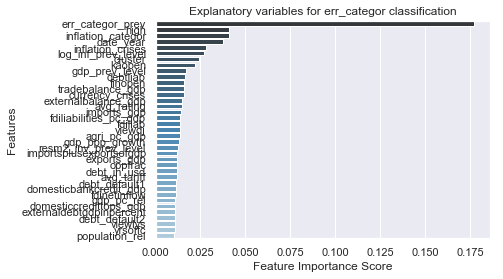

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias 

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

[[63  4  7  2]
 [ 9 18  2  1]
 [ 4  0 73  0]
 [ 1  0  2 19]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        76
           1       0.82      0.60      0.69        30
           2       0.87      0.95      0.91        77
           3       0.86      0.86      0.86        22

    accuracy                           0.84       205
   macro avg       0.84      0.81      0.82       205
weighted avg       0.84      0.84      0.84       205

0.8439024390243902
err_categor_prev            0.203804
date_year                   0.042566
cluster                     0.025226
inflation_categor           0.023929
inflation_crises            0.023632
kaopen                      0.022689
high                        0.021742
finopen                     0.021573
debtliab                    0.021465
log_inf_prev_level          0.019213
externalbalance_gdp         0.017306
currency_crises             0.017028
viewdj                      0.016485
trad

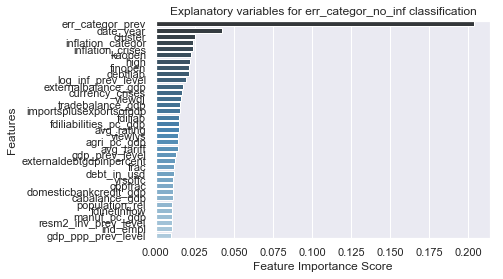

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias 

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

[[30 11  0  0  1]
 [ 1 51  1  0  3]
 [ 0  5 53  0  2]
 [ 0  0  2  0  0]
 [ 2  3  3  0 37]]
              precision    recall  f1-score   support

           1       0.91      0.71      0.80        42
           2       0.73      0.91      0.81        56
           3       0.90      0.88      0.89        60
           4       0.00      0.00      0.00         2
           5       0.86      0.82      0.84        45

    accuracy                           0.83       205
   macro avg       0.68      0.67      0.67       205
weighted avg       0.84      0.83      0.83       205

0.8341463414634146
err_categor_prev            0.180491
inflation_categor           0.036234
high                        0.036138
cluster                     0.035902
date_year                   0.032047
inflation_crises            0.027890
avg_rating                  0.024416
log_inf_prev_level          0.023421
gdp_pc_rel                  0.017484
fdiliabilities_pc_gdp       0.017103
debtliab                    0.0

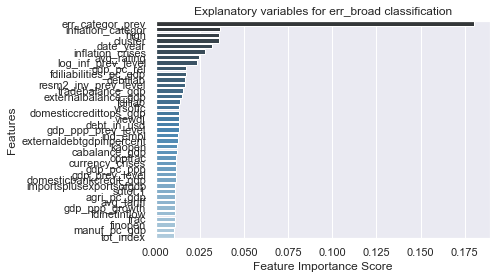

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias 

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

[[ 86   9]
 [  6 104]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.92      0.95      0.93       110

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

0.926829268292683
err_categor_prev            0.281343
inflation_crises            0.026848
date_year                   0.026817
high                        0.022955
kaopen                      0.022669
debtliab                    0.022541
avg_tariff                  0.022036
cluster                     0.021920
finopen                     0.021644
fdiliabilities_pc_gdp       0.020899
currency_crises             0.019231
log_inf_prev_level          0.018966
inflation_categor           0.018617
tradebalance_gdp            0.018503
importsplusexportsofgdp     0.017967
fdiliab                     0.016536
externalbalance_gdp         0.015719
pop

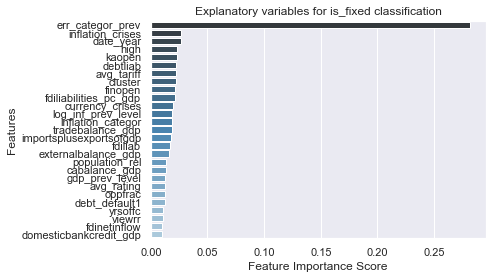

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias 

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

[[98  0  8]
 [ 1 42  0]
 [13  0 43]]
              precision    recall  f1-score   support

           1       0.88      0.92      0.90       106
           2       1.00      0.98      0.99        43
           3       0.84      0.77      0.80        56

    accuracy                           0.89       205
   macro avg       0.91      0.89      0.90       205
weighted avg       0.89      0.89      0.89       205

0.8926829268292683
date_year                   0.117153
viewdj                      0.074006
viewlys                     0.069567
viewrr                      0.052276
err_categor_prev            0.026317
currency_crises             0.023882
govfrac                     0.021254
avg_tariff                  0.020813
gdp_prev_level              0.020256
res_turnover                0.018551
fdiasset                    0.017688
finopen                     0.017473
cluster                     0.017424
sdtot:1                     0.016638
checks                      0.016614
govstren

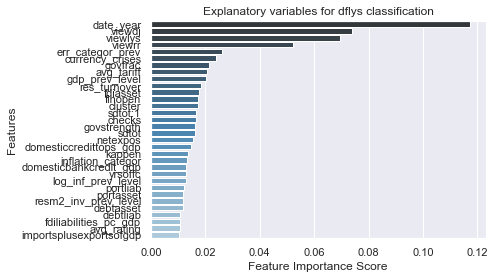

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias 

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

[[133   9]
 [ 25  38]]
              precision    recall  f1-score   support

           1       0.84      0.94      0.89       142
           2       0.81      0.60      0.69        63

    accuracy                           0.83       205
   macro avg       0.83      0.77      0.79       205
weighted avg       0.83      0.83      0.83       205

0.8341463414634146
date_year                   0.064748
res_turnover                0.043100
err_categor_prev            0.036913
viewdj                      0.036131
viewlys                     0.035913
cluster                     0.035862
gdp_prev_level              0.035592
currency_crises             0.032891
domestic_debt_default       0.023664
is_democratic               0.022956
yrsoffc                     0.021585
oppfrac                     0.018459
fdiasset                    0.018165
resm2_inv_prev_level        0.017510
manuf_pc_gdp                0.017451
viewrr                      0.017388
finopen                     0.016232
av

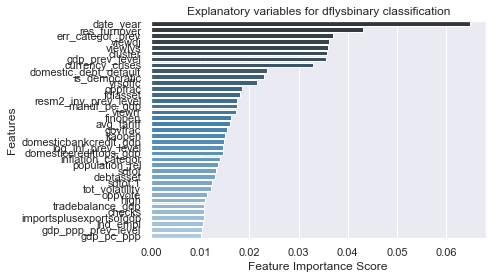

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias 

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

[[126   0   0   2   0]
 [  0  14   0   5   0]
 [  0   0   5   3   0]
 [  1   2   0  23   0]
 [  1   1   0  10  12]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.82      0.74      0.78        19
           2       1.00      0.62      0.77         8
           3       0.53      0.88      0.67        26
           4       1.00      0.50      0.67        24

    accuracy                           0.88       205
   macro avg       0.87      0.75      0.77       205
weighted avg       0.91      0.88      0.88       205

0.8780487804878049
date_year                   0.181456
viewrr                      0.060677
viewdj                      0.056152
err_categor_prev            0.039672
fdiliabilities_pc_gdp       0.031960
kaopen                      0.028908
debtliab                    0.026205
log_inf_prev_level          0.024489
inflation_categor           0.023934
viewlys                     0.022498
fdiass

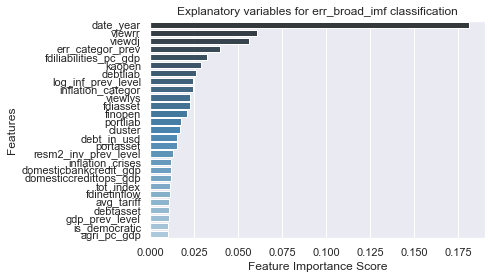

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias 

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[[109   0]
 [ 14  82]]
              precision    recall  f1-score   support

           1       0.89      1.00      0.94       109
           2       1.00      0.85      0.92        96

    accuracy                           0.93       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.94      0.93      0.93       205

0.9317073170731708
date_year                   0.109443
err_categor_prev            0.069039
viewlys                     0.053451
finopen                     0.051767
viewrr                      0.047654
viewdj                      0.041164
fdinetinflow                0.032004
avg_tariff                  0.026532
netexpos                    0.022864
cluster                     0.022692
checks                      0.020166
tot_index                   0.016415
fdiasset                    0.016410
govstrength                 0.016311
manuf_pc_gdp                0.015672
yrsoffc                     0.014598
kaopen                      0.014193
sd

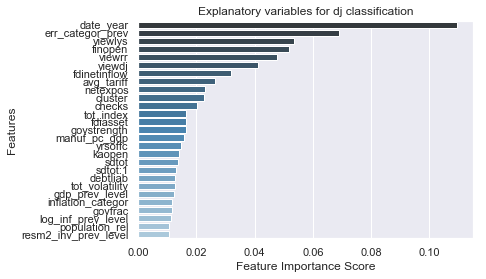

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias 

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

[[205]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       205

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

1.0
cluster                     0.0
cabalance_gdp               0.0
gdp_ppp_prev_level          0.0
gdp_pc_ppp                  0.0
gdp_growth                  0.0
gdp_prev_level              0.0
sdtot:1                     0.0
tot_index                   0.0
tradebalance_gdp            0.0
importsplusexportsofgdp     0.0
res_turnover                0.0
fdiliabilities_pc_gdp       0.0
oppfrac                     0.0
oppvote                     0.0
debt_in_usd                 0.0
fdi_liab_gdp                0.0
gdp_pc_rel                  0.0
viewrr                      0.0
gdp_ppp_growth              0.0
resm2_inv_prev_level        0.0
date_year                   0.0
domestic_debt_default       0.0
tot_volatil

ValueError: min() arg is an empty sequence

In [627]:
#Loop through dependent variables and create a separate model for each
deps = ['err_categor','err_categor_no_inf','err_broad','is_fixed','dflys','dflysbinary','err_broad_imf','dj','djbinary']
#deps = ['err_categor']

i=0

for dep in deps:
    y = pd.DataFrame(dependent[dep])
    X = pd.DataFrame(explanatory)
    

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    from sklearn.ensemble import RandomForestClassifier

    classifier = RandomForestClassifier(n_estimators = 1000, criterion='gini',max_depth = 7, random_state = 42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

    print(confusion_matrix(y_test,y_pred))

    print(classification_report(y_test, y_pred))

    print(accuracy_score(y_test, y_pred))


    # Evaluate which features perform the best
    bin_feature_imp = pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(bin_feature_imp)
    
    model_acc = accuracy_score(y_test, y_pred)
    
    var = bin_feature_imp.where(bin_feature_imp>0.01).dropna()
    
    # Create a bar chart of the top features
    import matplotlib.pyplot as plt
    import seaborn as sb
    %matplotlib inline

    sb.barplot(x=var,y=var.index, palette="Blues_d")
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Explanatory variables for %s classification' %dep)

    #plt.figure(figsize=(30,20))
    sb.set(rc={"figure.figsize":(24, 32)})

    plt.show()
    
    bin_feature_imp = bin_feature_imp.where(bin_feature_imp>0.001).dropna()

    df1 = pd.DataFrame(bin_feature_imp).reset_index().rename(columns={'index':'feature',0:'importance'})
    df1['dependent'] = dep
    df1['model_accuracy'] = round(model_acc,2)
    
    feature_df = feature_df.append(df1)
    i+=1

In [ ]:
feature_df

In [ ]:
feature_df.to_excel('/Users/merilin/features_RF_1.xlsx')

In [ ]:
# Test with top features and exclude fixed effects (prev ERR)

top_feats = ['high',
'inflation_crises',
'date_year',
'log_inf_prev_level',
'cluster_id',
'debtliab',
'viewdj',
'imports_gdp',
'gdp_ppp_growth',
'cabalance_gdp',
'gdp_prev_level',
'kaopen',
'externalbalance_gdp',
'debt_default2',
'fdiliab',
'tradebalance_gdp',
'exports_gdp',
'frac',
'resm2_inv_prev_level',
'domesticbankcredit_gdp',
'oppfrac',
'agri_pc_gdp',
'currency_crises',
'yrsoffc',
'finopen',
'externaldebtgdpinpercent',
'tot_index',
'debt_in_usd',
'fdiasset',
'viewlys',
'gdp_pc_ppp',
'gdp_pc_rel',
'avg_rating',
'gdp_ppp_prev_level',
'ind_empl',
'fdinetinflow',
'importsplusexportsofgdp',
'manuf_pc_gdp',
'debtasset',
'fdiliabilities_pc_gdp',
'domesticcredittops_gdp',
'avg_tariff',
'checks',
'portasset']

In [ ]:
top_feats_total = [
'viewdj',
'population_rel',
'viewrr',
'gdp_prev_level',
'fdiliab',
'resm2_inv_prev_level',
'viewlys',
'avg_tariff',
'finopen',
'inflation_categor',
'debtliab',
'high',
'fdiliabilities_pc_gdp',
'kaopen',
'res_turnover',
'inflation_crises',
'gdp_pc_rel',
'externalbalance_gdp',
'tradebalance_gdp',
'importsplusexportsofgdp',
'domesticbankcredit_gdp',
'gdp_pc_ppp',
'domesticcredittops_gdp',
'cabalance_gdp',
'agri_pc_gdp',
'manuf_pc_gdp',
'avg_rating',
'fdiasset',
'fdinetinflow',
'netexpos',
'debt_in_usd',
'gdp_ppp_prev_level',
'externaldebtgdpinpercent',
'frac',
'tot_volatility',
'tot_index',
'govstrength']

In [ ]:
explanatory_df = explanatory[top_feats_total]
explanatory_df

In [637]:
df['is_autocratic']

0      1
1      1
2      1
3      0
4      0
      ..
677    0
678    0
679    0
680    0
681    0
Name: is_autocratic, Length: 682, dtype: int64

In [ ]:
feature_df1 = pd.DataFrame(columns=['feature','importance','dependent','model_accuracy'])

In [ ]:
#Loop through dependent variables and create a separate model for each
#deps = ['err_categor','err_categor_no_inf','err_broad','is_fixed','dflys','dflysbinary','err_broad_imf']
deps = ['err_categor_no_inf']

i=0

for dep in deps:
    y = pd.DataFrame(dependent[dep])
    X = pd.DataFrame(explanatory_df)
    

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    from sklearn.ensemble import RandomForestClassifier

    classifier = RandomForestClassifier(n_estimators = 1000, criterion='gini',max_depth = 7, random_state = 42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

    print(confusion_matrix(y_test,y_pred))

    print(classification_report(y_test, y_pred))

    print(accuracy_score(y_test, y_pred))


    # Evaluate which features perform the best
    bin_feature_imp = pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
    #print(bin_feature_imp)
    
    model_acc = accuracy_score(y_test, y_pred)
    
    var = bin_feature_imp.where(bin_feature_imp>0.01).dropna()
    
    # Create a bar chart of the top features
    import matplotlib.pyplot as plt
    import seaborn as sb
    %matplotlib inline

    sb.barplot(x=var,y=var.index, palette="Blues_d")
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Explanatory variables for %s classification' %dep)

    #plt.figure(figsize=(30,20))
    sb.set(rc={"figure.figsize":(24, 32)})

    plt.show()

    df1 = pd.DataFrame(bin_feature_imp).reset_index().rename(columns={'index':'feature',0:'importance'})
    df1['dependent'] = dep
    df1['model_accuracy'] = round(model_acc,2)
    
    feature_df1 = feature_df1.append(df1)
    i+=1

In [633]:
feature_df1[-80:]

feature  importance           dependent  model_accuracy
31              res_turnover    0.015836  err_categor_no_inf            0.80
32            tot_volatility    0.014702  err_categor_no_inf            0.80
33                  netexpos    0.012943  err_categor_no_inf            0.80
34                    viewrr    0.012582  err_categor_no_inf            0.80
35               govstrength    0.010945  err_categor_no_inf            0.80
36                  fdiasset    0.010248  err_categor_no_inf            0.80
0             population_rel    0.055284  err_categor_no_inf            0.82
1                     kaopen    0.043119  err_categor_no_inf            0.82
2                    finopen    0.041695  err_categor_no_inf            0.82
3       resm2_inv_prev_level    0.040944  err_categor_no_inf            0.82
4             gdp_prev_level    0.035413  err_categor_no_inf            0.82
5                    fdiliab    0.033391  err_categor_no_inf            0.82
6                       frac    0.033026  err_categor_no_inf            0.82
7        externalbalance_gdp    0.032560  err_categor_no_inf            0.82
8                       high    0.031896  err_categor_no_inf            0.82
9           tradebalance_gdp    0.031593  err_categor_no_inf            0.82
10     fdiliabilities_pc_gdp    0.031518  err_categor_no_inf            0.82
11                gdp_pc_rel    0.031374  err_categor_no_inf            0.82
12                  debtliab    0.030804  err_categor_no_inf            0.82
13                avg_tariff    0.030572  err_categor_no_inf            0.82
14   importsplusexportsofgdp    0.029734  err_categor_no_inf            0.82
15         inflation_categor    0.028987  err_categor_no_inf            0.82
16               debt_in_usd    0.027916  err_categor_no_inf            0.82
17          inflation_crises    0.027593  err_categor_no_inf            0.82
18                    viewdj    0.027546  err_categor_no_inf            0.82
19                avg_rating    0.027396  err_categor_no_inf            0.82
20                gdp_pc_ppp    0.026030  err_categor_no_inf            0.82
21    domesticbankcredit_gdp    0.025908  err_categor_no_inf            0.82
22               agri_pc_gdp    0.025659  err_categor_no_inf            0.82
23             cabalance_gdp    0.024416  err_categor_no_inf            0.82
24        gdp_ppp_prev_level    0.023337  err_categor_no_inf            0.82
25    domesticcredittops_gdp    0.022948  err_categor_no_inf            0.82
26              fdinetinflow    0.022107  err_categor_no_inf            0.82
27              manuf_pc_gdp    0.021898  err_categor_no_inf            0.82
28  externaldebtgdpinpercent    0.020393  err_categor_no_inf            0.82
29              res_turnover    0.018187  err_categor_no_inf            0.82
30                 tot_index    0.017165  err_categor_no_inf            0.82
31            tot_volatility    0.017069  err_categor_no_inf            0.82
32                   viewlys    0.015809  err_categor_no_inf            0.82
33                  netexpos    0.015055  err_categor_no_inf            0.82
34                    viewrr    0.011506  err_categor_no_inf            0.82
35               govstrength    0.010585  err_categor_no_inf            0.82
36                  fdiasset    0.009566  err_categor_no_inf            0.82
0             population_rel    0.055099  err_categor_no_inf            0.75
1                       high    0.041658  err_categor_no_inf            0.75
2                     kaopen    0.041277  err_categor_no_inf            0.75
3                 avg_tariff    0.040577  err_categor_no_inf            0.75
4                    fdiliab    0.039142  err_categor_no_inf            0.75
5                    finopen    0.036591  err_categor_no_inf            0.75
6           inflation_crises    0.036026  err_categor_no_inf            0.75
7                   debtliab    0.035846  err_categor_no_inf            0.75
8             gdp

In [581]:
feature_df1.to_excel('/Users/merilin/features_RF_top2.xlsx')

In [628]:
X_test['Predicted ERR'] = y_pred
X_test['Actual ERR'] = y_test
X_test

/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/merilin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cluster  date_year  err_categor_prev population_rel  \
432       14       2009                 3              1   
361       12       2000                 2              3   
322       11       1992                 0              1   
547       18       2000                 3              4   
249        9       1981                 3              2   
220        8       1983                 0              3   
355       12       1994                 0              3   
524       17       2008                 1              2   
404       14       1981                 4              1   
399       13       2007                 4              2   
101        4       1988                 1              3   
177        6       2002                 3              2   
226        8       1989                 0              3   
675       22       2004                 4              4   
100        4       1987                 1              3   
150        5       2006                 1              4   
562       19       1984                 1              1   
462       15       2008                 1              4   
376       13       1984                 4              2   
518       17       2002                 2              2   
3          1       1983                 0              4   
421       14       1998                 3              1   
23         1       2003                 0              4   
601       20       1992                 4              1   
277        9       2009                 4              2   
221        8       1984                 0              3   
353       12       1992                 2              3   
580       19       2002                 4              1   
566       19       1988                 0              1   
525       17       2009                 1              2   
307       10       2008                 3              3   
58         2       2007                 3              3   
200        7       1994                 3              3   
251        9       1983                 3              2   
618       20       2009                 3              1   
303       10       2004                 3              3   
571       19       1993                 0              1   
403       14       1980                 4              1   
178        6       2003                 3              2   
333       11       2003                 3              1   
243        8       2006                 4              3   
85         3       2003                 1              4   
438       15       1984                 0              4   
470       16       1985                 0              2   
449       15       1995                 2              4   
141        5       1997                 2              4   
159        6       1984                 0              1   
457       15       2003                 1              4   
209        7       2003                 3              3   
398       13       2006                 4              2   
231        8       1994                 0              3   
334       11       2004                 3              1   
390       13       1998                 2              2   
215        7       2009                 3              3   
559       19       1981                 2              1   
368       12       2007                 3              3   
630       21       1990                 0              1   
149        5       2005                 1              4   
628       21       1988                 0              1   
596       20       1987                 4              1   
47         2       1996                 3              2   
411       14       1988                 3              1   
282       10       1983                 4              3   
175        6       2000                 3              1   
196        7       1990                 0              3   
442       15       1988                 0    

In [629]:
final_df = pd.merge(X_test,df['country'],left_index=True, right_index=True)

In [630]:
final_df.to_excel('/Users/merilin/compare_results3.xlsx')

In [435]:
# Visualise most important 20 features in a decision tree
top_feats = ['high', 'inflation_categor', 'date_year', 'cluster_id',
       'inflation_crises', 'kaopen', 'imports_gdp', 'viewdj', 'debtliab',
       'gdp_ppp_growth', 'fdiliab', 'resm2_inv_prev_level',
       'gdp_prev_level', 'oppfrac', 'domesticcredittops_gdp',
       'avg_rating', 'tradebalance_gdp', 'agri_pc_gdp', 'finopen',
       'currency_crises', 'externalbalance_gdp', 'yrsoffc',
       'domesticbankcredit_gdp', 'debt_in_usd',
       'externaldebtgdpinpercent', 'frac', 'exports_gdp', 'cabalance_gdp',
       'gdp_pc_rel', 'fdiliabilities_pc_gdp', 'sdtot',
       'importsplusexportsofgdp', 'avg_tariff', 'tot_index']

In [595]:
X_dt = explanatory[top_feats_total]
y_dt = dependent['err_categor_no_inf']

In [596]:
unique_values = list(set(y_dt))
y_vals = []

for val in unique_values:
    val = str(val)
    y_vals.append(val)
    
y_vals

['0', '1', '2', '3']

/Users/merilin/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


Feature names:  Index(['viewdj', 'population_rel', 'viewrr', 'gdp_prev_level', 'fdiliab',
       'resm2_inv_prev_level', 'viewlys', 'avg_tariff', 'finopen',
       'inflation_categor', 'debtliab', 'high', 'fdiliabilities_pc_gdp',
       'kaopen', 'res_turnover', 'inflation_crises', 'gdp_pc_rel',
       'externalbalance_gdp', 'tradebalance_gdp', 'importsplusexportsofgdp',
       'domesticbankcredit_gdp', 'gdp_pc_ppp', 'domesticcredittops_gdp',
       'cabalance_gdp', 'agri_pc_gdp', 'manuf_pc_gdp', 'avg_rating',
       'fdiasset', 'fdinetinflow', 'netexpos', 'debt_in_usd',
       'gdp_ppp_prev_level', 'externaldebtgdpinpercent', 'frac',
       'tot_volatility', 'tot_index', 'govstrength'],
      dtype='object')
Target names:  ['0', '1', '2', '3']
Target values:  2    259
0    228
3    101
1     94
Name: err_categor_no_inf, dtype: int64


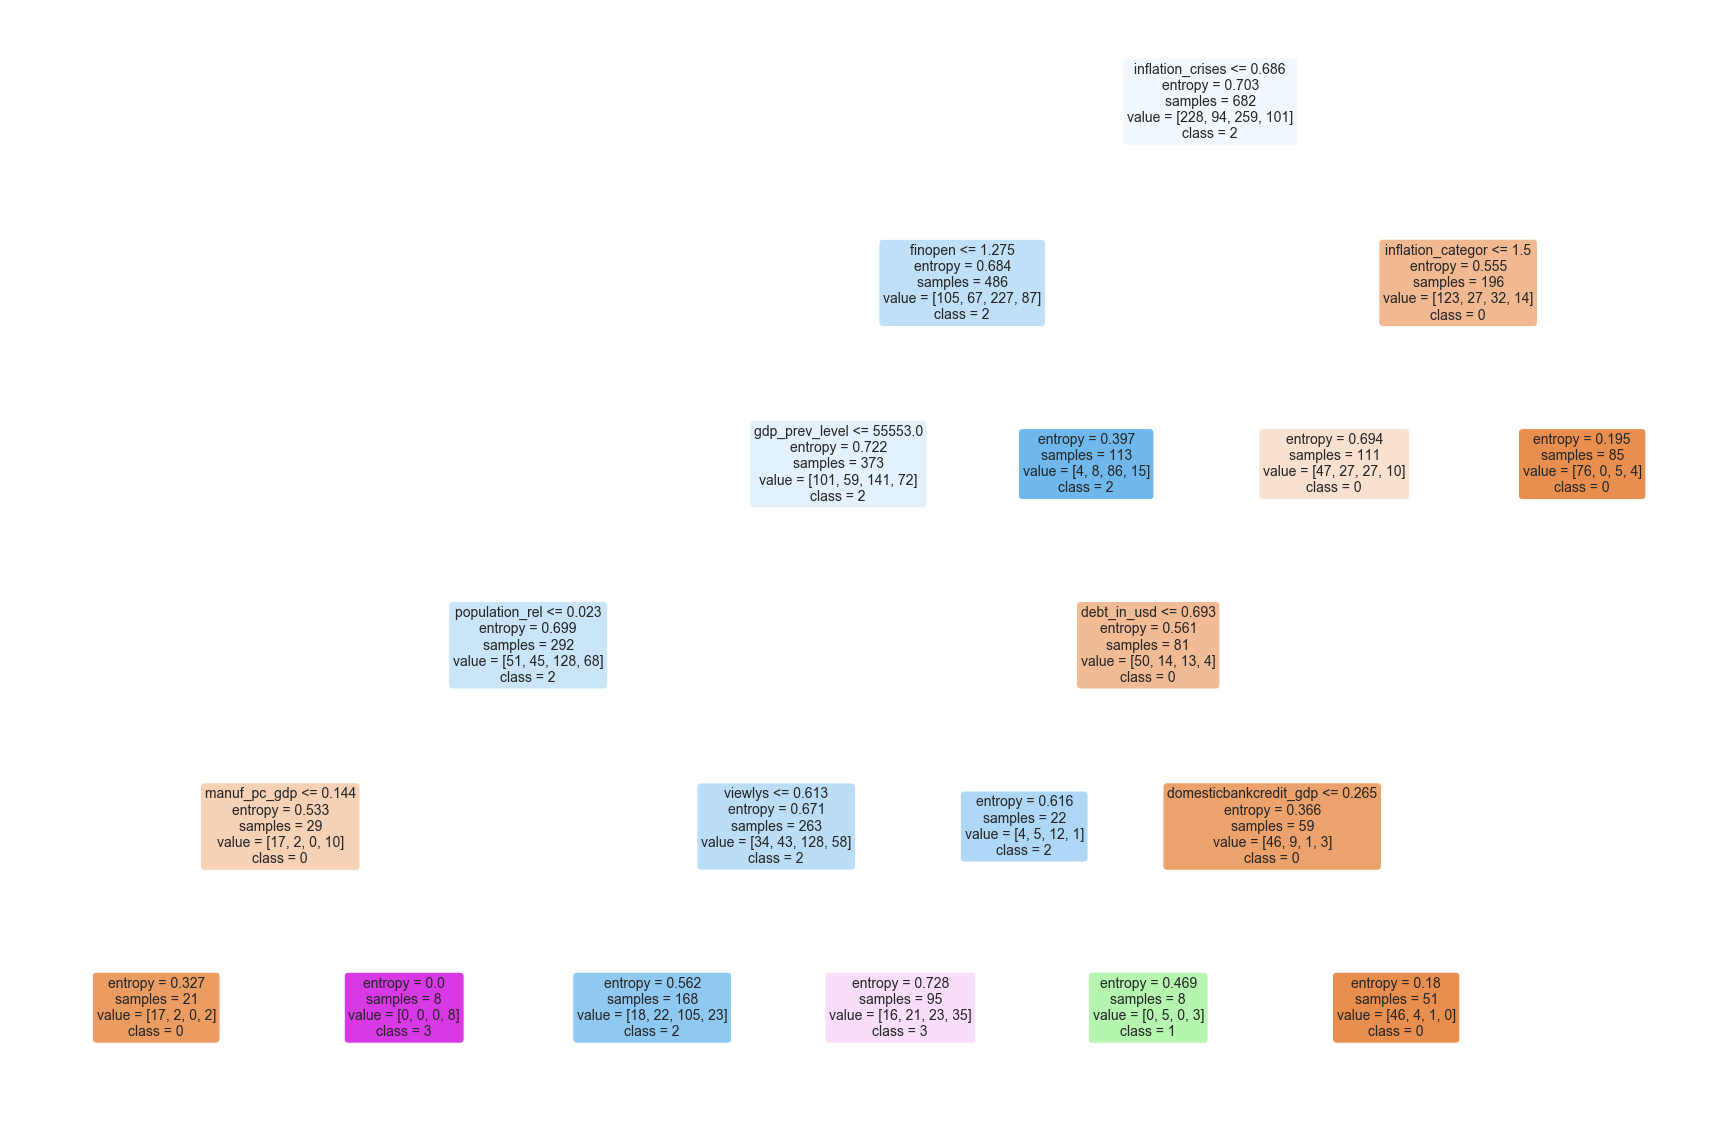

In [597]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5, max_features = 20, max_leaf_nodes=10) #max_depth is maximum number of levels in the tree
clf.fit(X_dt, y_dt)

print('Feature names: ',X_dt.columns)
print('Target names: ',y_vals)
print('Target values: ', y_dt.value_counts())

plt.figure(figsize=(30,20))
_= plot_tree(clf, feature_names=X_dt.columns, class_names=y_vals,
              filled=True, rounded=True, fontsize=14)

In [598]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_dt.columns
                                , class_names=y_vals
                                , filled=False)

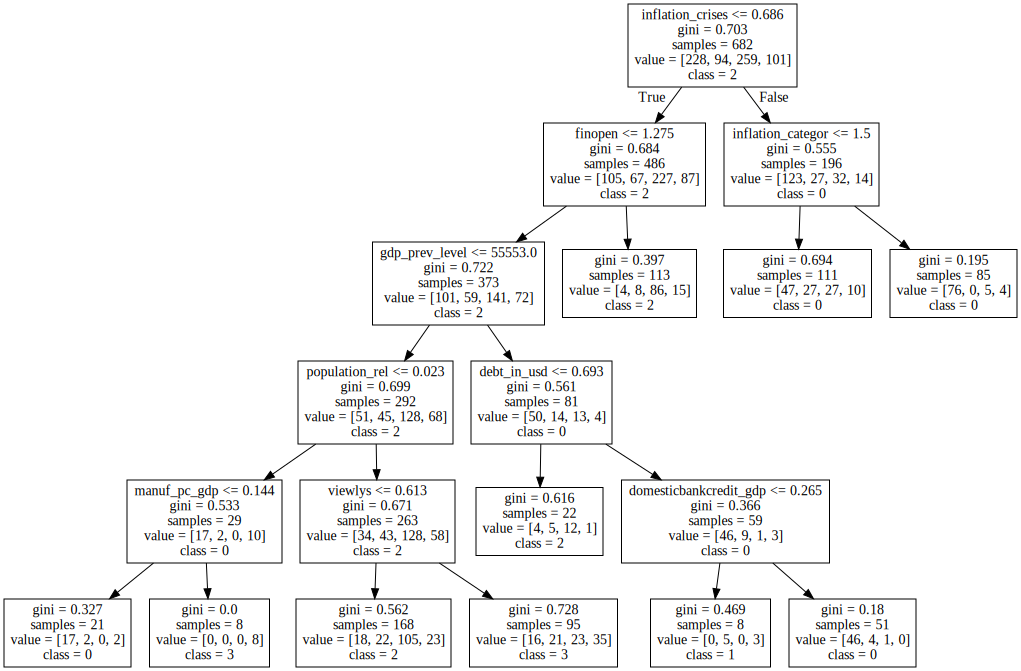

In [599]:
# Draw graph
graph = graphviz.Source(dot_data, format="jpg") 
graph

In [600]:
graph.render('bnw_dt_graph_no_inf.png')

'bnw_dt_graph_no_inf.png.jpg'